<h1 align='center' style="margin-bottom: 0px"> An end to end implementation of a Optical Character Recognition(OCR) </h1>
<h4 align='center' style="margin-top: 0px"> Hyungsuk Kang</h4>
<h4 align='center' style="margin-top: 0px"> Computer Science and Engineering, Sungkyunkwan University</h4>
<h4 align='center' style="margin-top: 0px"> Unemployed</h4>

> 위 듀토리얼은 [Spandan-Madan](https://github.com/Spandan-Madan)의 Deeplearning Project를 참고하여 한국어 버전으로 만들어본 것입니다.


<h2 align='center' style="margin-top: 0px"><a href='https://github.com/Spandan-Madan/DeepLearningProject'>Link to Github Repo</a></h2>

# Section 1. 서론

### 이 글을 쓴 계기
2015년 말부터 opencv를 공부하는 도중에 왜 haarcascade classifier로 물체는 인식할 수 있었으나 글자마다 저 classifier를 만들어야 하는 것에 답답했던 나는 CNN을 이용한 문자인식을 사용해보고 싶었었다. 데이터셋을 기다리면서 계속 이미지 프로세싱과 ML/DL을 공부하고 있었는데 마침 Stanford Artificial Intelligence Labortory(SAIL)에서 제공한 데이터셋을 찾게 되었고 이를 통해 인공지능을 훈련시킨 결과를 공유하고자 한다.



### 왜 이 튜토리얼을 썼는가?
전에 엮은 [Spandan-Madan](https://github.com/Spandan-Madan)의 생각처럼 그저 *10분 만에 끝내는 텐서플로우 MNIST*라던가 *15분만에 끝내는 인공신경망 튜토리얼*로 코드를 복붙하면서 분석의 한 파트만 끝내는 것이 아닌 실제 데이터를 분석함으로써 생기는 일련의 과정들을 보여주기 위해서 위 튜토리얼을 제작했습니다.

### 저자 소개

제 이름은 <a href="https://www.linkedin.com/in/hyungsuk-kang-5217a7103/">강형석</a>입니다, 성균관대학교 컴퓨터공학과에 다니고 전에는 [IoT에 관한 연구](http://ieeexplore.ieee.org/document/7763534/)를 한 적이 있었으나 지금은 인공지능을 이용한 smart IoT device를 만드는데 관심이 많습니다. 현재 휴학한 뒤 Udacity Robotics Nanodegree에 다니고 있습니다.

# Section 2. Project Outline : Optical Character Recognition

### OCR이 뭔가요?

### 위키피디아에 의하면
> **광학 문자 인식(Optical character recognition; OCR)은 사람이 쓰거나 기계로 인쇄한 문자의 영상을 이미지 스캐너로 획득하여 기계가 읽을 수 있는 문자로 변환하는 것이다. 이미지 스캔으로 얻을 수 있는 문서의 활자 영상을 컴퓨터가 편집 가능한 문자코드 등의 형식으로 변환하는 소프트웨어로써 일반적으로 OCR이라고 하며, OCR은 인공지능이나 기계 시각(machine vision)의 연구분야로 시작되었다.** 거울이나 렌즈 등의 광학 기술을 이용한 광학 문자 인식과 스캐너 및 알고리즘에 의한 디지털 문자 인식은 다른 영역으로 생각되었으나 이제는 광학 문자 인식이라는 말이 디지털 문자 인식을 포함하는 것으로 간주되었다.


### 좀 더 간략히 하면

인풋: 글자(카메라에 찍히는)
![인풋](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT5m130Nzqe0gHH9E0FY8mZSXEDjFeFZfrSqMH1lxIjYc43_AXD)

아웃풋: 글자(컴퓨터에 적히거나 쓰는)

# o

#### 주어진 데이터:
- 2차원 또는 5차원 텐서 이미지 data point $x_i$ 
- $x_i$에 해당하는 알파벳 글자 $y_1,y_2...y_n $ (n=26)  <br>

#### 할 일 : 
주어진 데이터셋에 포함하지 않는 data point $x_k$에 대한 알맞은 $y_k$를 예측하는 것.

#### 문제점 : 
$x$ 와 $y$가 어떻게 관련되어 있는지 알 수가 없다.

#### 가정 : 
그럼에도 불구하고 $x$와 $y$ 에 관련된 함수 $f$가 있다고 가정한다. i.e. ( $f(x_i)=y_i$)

#### 접근 방법 : 
함수 $f$를 알지 못하므로, 우리는 함수 $f$에 근접한 $g$를 배우게 한다.

#### 고려사항 : 
- 만약 모든 $x_i$에 대하여 $f(x_i)=g(x_i)=y_i$이 성립한다면, 함수 $f$와 $g$는 완벽하게 일치한다. 이건 절대로 불가능할 것이며 우리는 함수 $g$를 이용해 $f$에 가까워질 뿐이다. 즉, 예측인 $g(x_i)$이 종종 참이 아닐 수도 있다. 그리고 기본적으로 목표는 이러한 오류를 **매우** 낮게 만드는 것이다.

- 여러가지 접근 방법이 있지만 완벽한 방법으로서는 "지도 학습"을 도입한다. 또한 함수 $g$가 $f$에 가까워짐으로서 데이터셋에 포함되지 않은 데이터 마저 예측하는 것을 **"일반화"**라고 한다. 이 모델로써 중요한 점은 주어진 데이터셋도 맞계 예측할 수 있을 뿐만이 아니라 **다른 데이터**들도 예측할 수 있다는 것이다.

- 일반화에 관한 건 이 튜토리얼 뒷부분에서 다루기로 한다.


# 이 프로젝트에서는 이미지 데이터를 사용하여 알파벳 글자를 인식해냅니다.

# Project Outline

- **데이터 스크레이핑** : 데이터를 받아와서 골라내는 게 데이터 분석의 시작입니다. 데이터는 [SAIL이 제작한 OCR 데이터셋](http://ai.stanford.edu/~btaskar/ocr/)을 이용
- **데이터 전처리**
- **train test 데이터 나누기**
- **CNN**
- **모델 평가하기** 
- **모바일 환경에 모델 올리기**
- **후 계획**


# Section 3. 나만의 데이터셋 만들기


# 데이터 스크레이핑

이 프로젝트는 Stanford Artificial Intelligence Labortory에서 제공하는 [OCR 데이터셋](http://ai.stanford.edu/~btaskar/ocr/)을 사용합니다.

# 하는 방법

- 열과 행에 해당하는 letter.names, letter.data.gz 파일들을 다운로드한다.
- 열과 행을 pandas로 이용하여 DataFrame으로 만든다.
- 열들을 모아서 이미지로 만든 다음 배열로 만든다.

In [1]:
import numpy as np
import scipy.ndimage
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(2) # seed 값 정하기

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools


import csv
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, TensorBoard


sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [101]:
# 데이터 다운로드
!wget http://ai.stanford.edu/~btaskar/ocr/letter.names
!wget http://ai.stanford.edu/~btaskar/ocr/letter.data.gz
!tar -xf letter.data.gz


--2017-08-07 23:36:43--  http://ai.stanford.edu/~btaskar/ocr/letter.data.gz
Resolving ai.stanford.edu... 171.64.68.10
Connecting to ai.stanford.edu|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1329012 (1.3M) [application/x-gzip]
Saving to: ‘letter.data.gz.2’

letter.data.gz.2    100%[===================>]   1.27M   219KB/s    in 6.6s    

2017-08-07 23:36:50 (197 KB/s) - ‘letter.data.gz.2’ saved [1329012/1329012]

tar: Unrecognized archive format
tar: Error exit delayed from previous errors.
--2017-08-07 23:36:50--  http://ai.stanford.edu/~btaskar/ocr/letter.names
Resolving ai.stanford.edu... 171.64.68.10
Connecting to ai.stanford.edu|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 856 [text/plain]
Saving to: ‘letter.names.1’

letter.names.1      100%[===================>]     856  --.-KB/s    in 0s      

2017-08-07 23:36:51 (37.1 MB/s) - ‘letter.names.1’ saved [856/856]



In [2]:
# DataFrame 만들기
r = [x[:-1] for x in csv.reader(open('letter.data','r'),delimiter='\t')]
print '-' *64
print 'rows'
print r[:5]

c = np.array([x for x in csv.reader(open('letter.names','r'),delimiter='\n')]).ravel()
print '-' * 64
print 'columns'
print c

df = pd.DataFrame(r, columns=c)
print '-'*64
print 'DataFrame'
print df.head()



----------------------------------------------------------------
rows
[['1', 'o', '2', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['2', 'm', '3', '1', '2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '

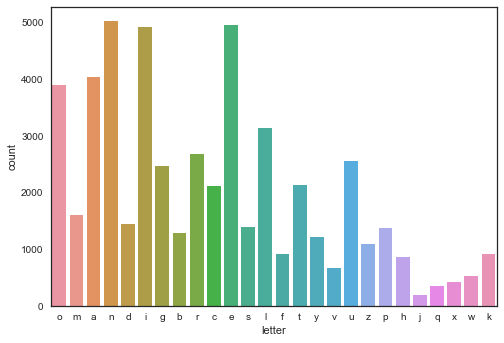

In [3]:
# 각 알파벳 분포 
df['letter'].value_counts()
letters = sns.countplot(df['letter'])

# 끝! 이제 데이터를 모두 들여왔다.

# Section 4. 데이터 전처리

X(input):
p_0_0 ~ p_15_7 까지의 값을 16x8 행렬로 바꿔준다.
이어서 8x16에서 28x28로 부풀리고
광각 차로 인한 오류를 줄이기 위해 normalization을 해준다.

Y(output):
라벨 인코딩 (ex : m -> [ 0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0 ])

In [4]:
# X 데이터 전처리

ocr = df[df.columns[6:]].as_matrix()
ocr = ocr.reshape(len(ocr),16,8).astype(np.uint8)
count = len(ocr)
ROWS = 28
COLS = 28
CHANNELS = 1
X = np.ndarray((count, ROWS, COLS, CHANNELS), dtype=np.uint8)
for i in range(count):
    img = scipy.misc.imresize(ocr[i], (28,28), interp='cubic')
    img = img.reshape(ROWS,COLS,CHANNELS)
    if i%250 == 0: print('Processed {} of {}'.format(i, count))
    X[i] = img
print("Done with all images!")

Processed 0 of 52152
Processed 250 of 52152
Processed 500 of 52152
Processed 750 of 52152
Processed 1000 of 52152
Processed 1250 of 52152
Processed 1500 of 52152
Processed 1750 of 52152
Processed 2000 of 52152
Processed 2250 of 52152
Processed 2500 of 52152
Processed 2750 of 52152
Processed 3000 of 52152
Processed 3250 of 52152
Processed 3500 of 52152
Processed 3750 of 52152
Processed 4000 of 52152
Processed 4250 of 52152
Processed 4500 of 52152
Processed 4750 of 52152
Processed 5000 of 52152
Processed 5250 of 52152
Processed 5500 of 52152
Processed 5750 of 52152
Processed 6000 of 52152
Processed 6250 of 52152
Processed 6500 of 52152
Processed 6750 of 52152
Processed 7000 of 52152
Processed 7250 of 52152
Processed 7500 of 52152
Processed 7750 of 52152
Processed 8000 of 52152
Processed 8250 of 52152
Processed 8500 of 52152
Processed 8750 of 52152
Processed 9000 of 52152
Processed 9250 of 52152
Processed 9500 of 52152
Processed 9750 of 52152
Processed 10000 of 52152
Processed 10250 of 52

In [5]:
X =  X / 255.0 # normalzing

In [6]:
# Y 데이터 전처리

y = [ord(i)-97 for i in df['letter']]
y = to_categorical(y, num_classes = 26)


# Train data와 Validation data로 나누기

33%의 데이터를 augmented data를 검증하는 데 사용하고 나머지는 augment한다.
random state를 42로 고정하여 다시 나눌 때도 같은 결과가 나오게 하여 데이터가 일관되게 한다.



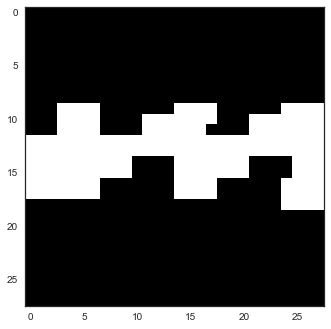

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.]


In [7]:
# train 데이터와 validation 데이터 나누기
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)


# 나눠진 데이터 모습
g = plt.imshow(X_train[1][:,:,0],  cmap='gist_heat')
plt.show(g)
print y_train[1]


# Section 5. CNN
## feature로 분류하는 것이 아닌 직관적으로 판단하는 딥러닝 모델 정의하기

SVM, k-nn, DecisionTree로 주어진 데이터들의 feature를 가지고 분류하는 머신러닝 모델과 달리
CNN은 픽셀들의 값들 만으로 스스로 학습해서 feature를 잡아내 분류하는 딥러닝 모델이다.

모델 설계를 위해 keras의 Sequential()을 사용하여 나타내었고 feature가 지워지는 것을 막기 위해 padding 옵션을 Same으로 맞추었다.

In [8]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', name='conv4'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(26, activation = "softmax"))



In [9]:
# 모델 요약
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv4 (Conv2D)               (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

# Optimizer와  Callback 설정

optimizer는 훈련의 과정을 담당하는 데 아주 중요한 역할을 한다.
optimizer는 훈련을 거칠 때마다 loss를 줄이기 위해 훈련 변수들을 바꿔주기 때문이다.
 

In [10]:
# 최적자 정의 
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [11]:
# 모델 최적자로 컴파일
# metrics는 훈련 후에 모델을 평가하기 위한 지표로 사용된다
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"]) 

<img src="http://img1.imagilive.com/0717/learningrates.jpg"> </img>
learning rate를 최대한 효율적으로 설정하기 위해 ReduceLROnPlateau class를 사용했다.

In [12]:
# LearningrateReducer 설정하기
callbacks = [
            ReduceLROnPlateau(monitor='val_acc', # 콜백이 모니터링 하는 값
                              patience=3, # 참는 횟수
                              verbose=1, # 상태 표시: 높을 수록 자세하다.
                              factor=0.5, 
                              min_lr=0.00001 # 최소 줄어드는 learning rate
                             ),
            TensorBoard(log_dir='./graph',
                        histogram_freq=0,
                        write_graph=True,
                        write_images=True
                       ),
            ]

# Data Augmentation

Data Augmentation은 데이터를 변형시켜서 훈련데이터의 양도 늘리고 좀 더 다양한 경우에서 훈련이 가능하게끔 해준다.
Data Augmentation을 쓰는 용도로는 2가지가 있다.


## 1. 적은 양의 데이터를 훈련시킬 때
**구글**이나 **페이스북**만큼 방대한 데이터를 가지고 있지 않아도 풍부한 데이터를 가질 수 있는 방법이 있다.
<img src="http://file2.instiz.net/data/file2/2015/12/05/8/1/f/81fdcc28ed3e8fb41389fe738c081235.jpg">
<center>**만들면 되는 것이다.**</center>



## 2. overfitting을 방지할 때

![Still a cat](https://s-media-cache-ak0.pinimg.com/564x/52/cb/44/52cb44e1856d890cf36c711159583f10.jpg)
<center>**평소 고양이의 얼굴은 아니지만 고양이라고 인식할 수 있어야 한다.**</center>



# keras는 이를 해결하기 위해서 ImageDataGenerator class를 이용한다.

In [13]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # 모든 입력 데이터 평균이 0이 되게끔 한다.
        samplewise_center=False,  # 각각의 입력 데이터 평균이 0이 되게끔 한다.
        featurewise_std_normalization=False,  # 입력 데이터들을 데이터의 표준편차로 나눈다.
        samplewise_std_normalization=False,  # 각각의 데이터를 전체 데이터의 표준 편차로 나눈다.
        zca_whitening=False,  # ZCA Whitening 적용(안에 있는 부분은 하얗게 처리되고 모서리만 돋보이게 하는 효과가 있다.)
        rotation_range=10,  # 무작위로 각도 범위 내에서 이미지를 돌린다 (degrees, 0 to 180)
        zoom_range = 0.1, # 무작위로 이미지를 확대시킨다
        width_shift_range=0.1,  # 무작위로 이미지를 좌우로 지정된 범위만큼 중심을 옮긴다 (전체 너비내의 부분)
        height_shift_range=0.1,  # 무작위로 이미지를 위아래로 지정된 범위만큼 중심을 옮긴다 (전체 높이의 부분)
        horizontal_flip=False,  # 무작위로 좌우로 뒤집는다
        vertical_flip=False)  # 무작위로 위아래로 뒤집는다


datagen.fit(X_train)

/Users/hyungsukkang/anaconda2/lib/python2.7/site-packages/keras/preprocessing/image.py:648: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (34941, 28, 28, 1) (1 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')


In [26]:
# 이미지 미리보기
i = 0
for batch in datagen.flow(X_train, batch_size=1,
                          save_to_dir='preview', save_prefix='letter', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [14]:
# 트레이닝 세팅 
epochs = 2 # 반복횟수
batch_size = 128 # batch size

In [15]:
# generator와 함께 모델을 훈련!
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=callbacks)

Epoch 1/2
380s - loss: 2.5071 - acc: 0.2576 - val_loss: 1.1452 - val_acc: 0.6656
Epoch 2/2
489s - loss: 1.3080 - acc: 0.6121 - val_loss: 0.6477 - val_acc: 0.8127


# Section 6. 모델 평가

모델을 훈련시키고 난 뒤 정작 이 모델이 잘 돌아가는 지 확인을 하지 않는다면 당신의 모델의 성능은 향상되지 않을 것이다.
이를 평가하기 위한 방법과 원인을 찾는 방법을 제시하고자 한다.

## 모델 훈련 과정 살펴보기



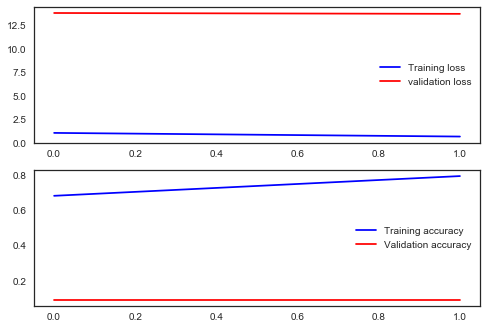

In [51]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

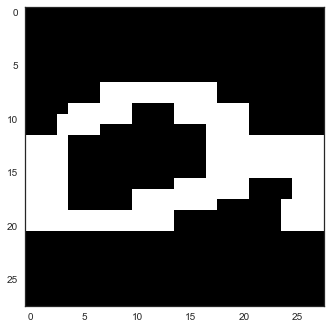

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.]


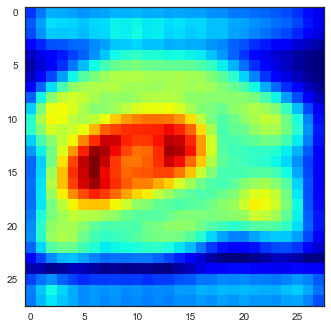

In [22]:
from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations
class_idx = 0
# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'conv4')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

heatmap = visualize_saliency(model, layer_idx, filter_indices=class_idx, seed_input=X_train[9])
g = plt.imshow(X_train[9][:,:,0],  cmap='gist_heat')
plt.show(g)
plt.imshow(heatmap)
print(y_train[9])

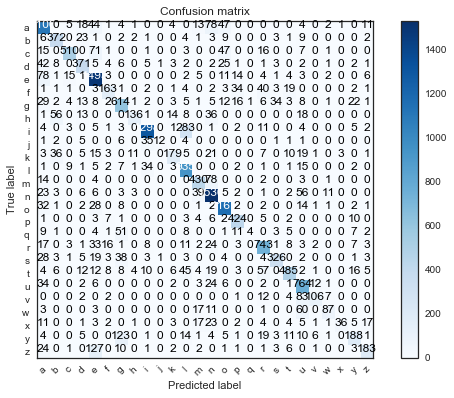

In [87]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

alphabet = []
for letter in range(97,123):
    alphabet.append(chr(letter))
# Predict the values from the validation dataset
y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = alphabet) 

# CoreML model로 만들기

In [89]:
from keras import models
models.save_model(model,'ocr_cnn_keras.h5')

In [96]:
import coremltools

output_labels = alphabet
scale = 1/255.
coreml_model = coremltools.converters.keras.convert('ocr_cnn_keras.h5',
                                                   input_names='image',
                                                   image_input_names='image',
                                                   output_names='output',
                                                   class_labels=output_labels,
                                                   image_scale=scale)
coreml_model.author = 'Hyungsuk Kang'
coreml_model.license = 'MIT'
coreml_model.short_description = 'Model to classify alphabet letters'

coreml_model.input_description['image'] = 'Grayscale image of alphabet'
coreml_model.output_description['output'] = 'Category of the alphabet'

coreml_model.save('Letters.mlmodel')

IOError: Unable to open file (Unable to open file: name = 'ocr_cnn_keras.h5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)